In [1]:
library(ape)
library(phytools)
library(geiger)
library(phylolm)
library(caper)
library(vioplot)

Warning message:
"package 'phytools' was built under R version 4.3.2"
Loading required package: maps

Warning message:
"package 'maps' was built under R version 4.3.2"
Loading required package: MASS

Loading required package: mvtnorm

Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information


Attaching package: 'sm'


The following object is masked from 'package:MASS':

    muscle


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [6]:
ddata <- read.csv('..//data//Data_mammalia_150.csv')
ttree <- read.nexus('..//data//1000_random_phylogenies_consensus _Vertlife.nexus')

ddata$phy_label <- gsub(" ","_",ddata$taxon_species)
row.names(ddata) <- ddata$phy_label

In [7]:
# return dataframe data and phylogenetic tree
prunDataTree <- function(data_data, data_tree, varc){
  # data_data, data.frame
  # data_tree, phylogenetic tree
  # varc, variable list, ie, varc = list(y='y_var', x='x_var',...)
  varc_values = unlist(varc, use.names = FALSE)
  data_sub <- data_data[complete.cases(data_data[varc_values]),]
  chk <- name.check(data_tree, data_sub)
  
  ttree.sub <- drop.tip(data_tree, chk$tree_not_data)
  ddata.sub <- data_sub[! rownames(data_sub) %in% chk$data_not_tree,]
  ddata.sub <- ddata.sub[order(ddata.sub$taxon_family), ]
  
  ttree.sub <- multi2di(ttree.sub)
  ttree.sub$node.label <- 1:length(ttree.sub$node.label)
  return(list(phy=ttree.sub, data=ddata.sub))
}

In [8]:
ddata_Nc = ddata[ddata$mammalia_class!='aquatic' & !is.na(ddata$Estimated_population_size),]
nrow(ddata_Nc)

[1] 63

## PGLS, census population size (NC) ~ generation time + adult mass

[1] "---------------------------Nc ~ gt + mass"



Call:
phylolm(formula = log(Estimated_population_size) ~ log(GT) + 
    log(mass), data = prun_data$data, phy = prun_data$phy, model = "lambda")

   AIC logLik 
 279.4 -134.7 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-5.4809 -1.5612 -0.4144  1.6862  5.4956 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
lambda : 0.6536243
sigma2: 0.05469003 

Coefficients:
            Estimate   StdErr t.value   p.value    
(Intercept) 30.99404  3.14996  9.8395 6.781e-14 ***
log(GT)     -1.58891  0.59253 -2.6816  0.009568 ** 
log(mass)   -0.38321  0.18572 -2.0634  0.043637 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.4444	Adjusted R-squared: 0.4249 

Note: p-values and R-squared are conditional on lambda=0.6536243.

mss+gt: length data:  60 
[1] "---------------------------Nc ~ mass"



Call:
phylolm(formula = log(Estimated_population_size) ~ log(mass), 
    data = prun_data$data, phy = prun_data$phy, model = "lambda")

   AIC logLik 
 284.2 -138.1 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-6.4646 -1.6005 -0.2512  1.5518  7.5114 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
lambda : 0.739159
sigma2: 0.07010629 

Coefficients:
            Estimate   StdErr t.value   p.value    
(Intercept) 23.73533  1.87607 12.6516 < 2.2e-16 ***
log(mass)   -0.74705  0.13212 -5.6542 5.028e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.3553	Adjusted R-squared: 0.3442 

Note: p-values and R-squared are conditional on lambda=0.739159.

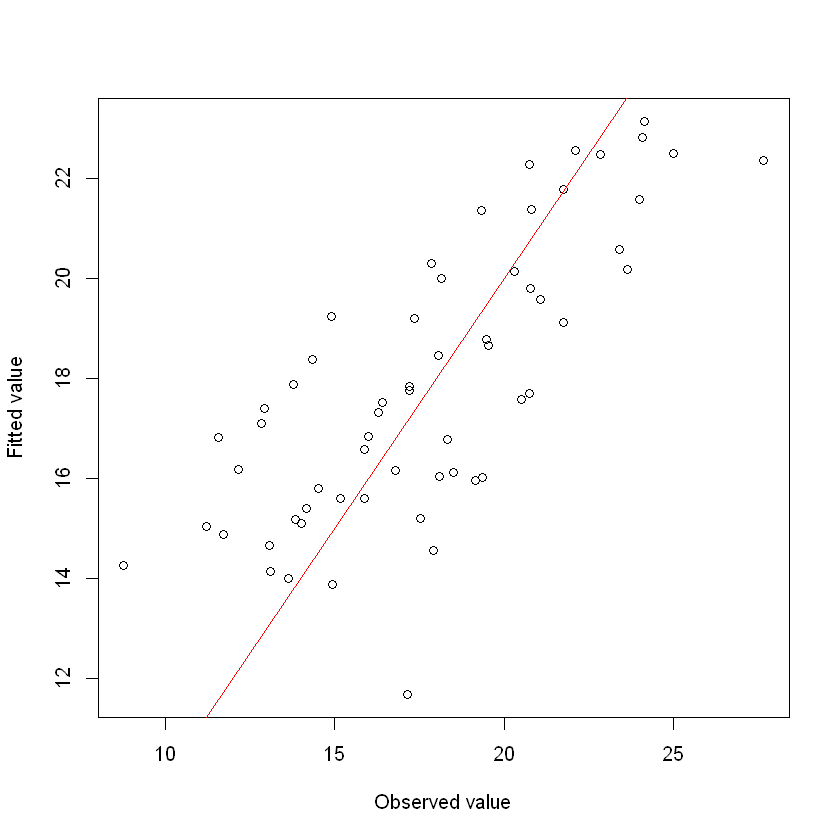

[1] "---------------------------Nc ~ GT"



Call:
phylolm(formula = log(Estimated_population_size) ~ log(GT), data = prun_data$data, 
    phy = prun_data$phy, model = "lambda")

   AIC logLik 
 281.7 -136.8 

Raw residuals:
   Min     1Q Median     3Q    Max 
-6.620 -1.978 -0.182  1.664  4.415 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
lambda : 0.6748635
sigma2: 0.06059728 

Coefficients:
            Estimate   StdErr t.value   p.value    
(Intercept) 33.96918  2.91750 11.6433 < 2.2e-16 ***
log(GT)     -2.50509  0.40498 -6.1858 6.719e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.3975	Adjusted R-squared: 0.3871 

Note: p-values and R-squared are conditional on lambda=0.6748635.

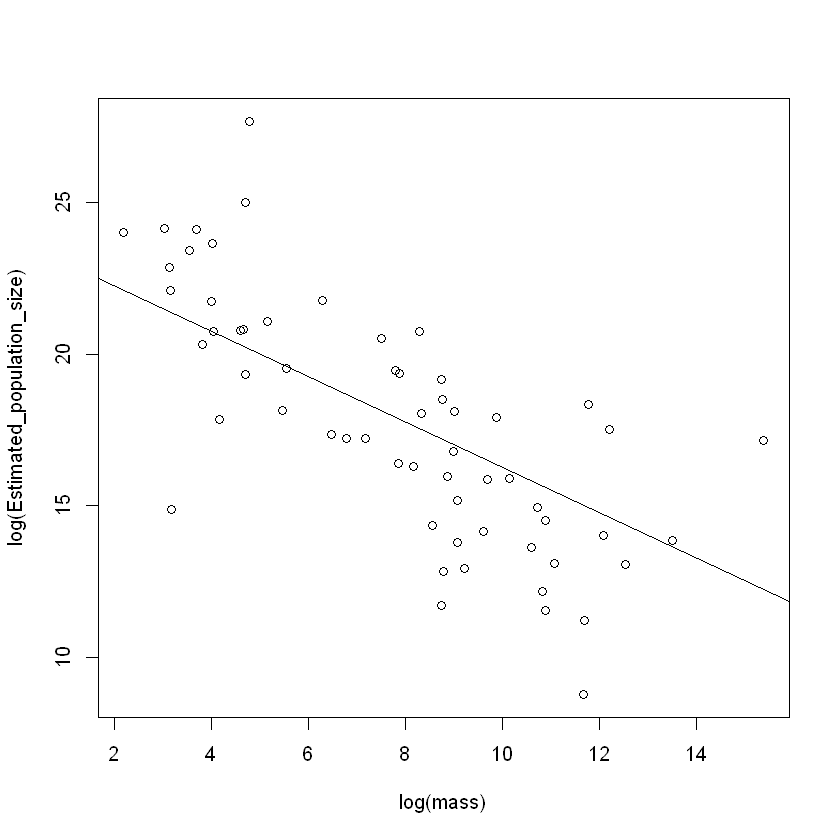

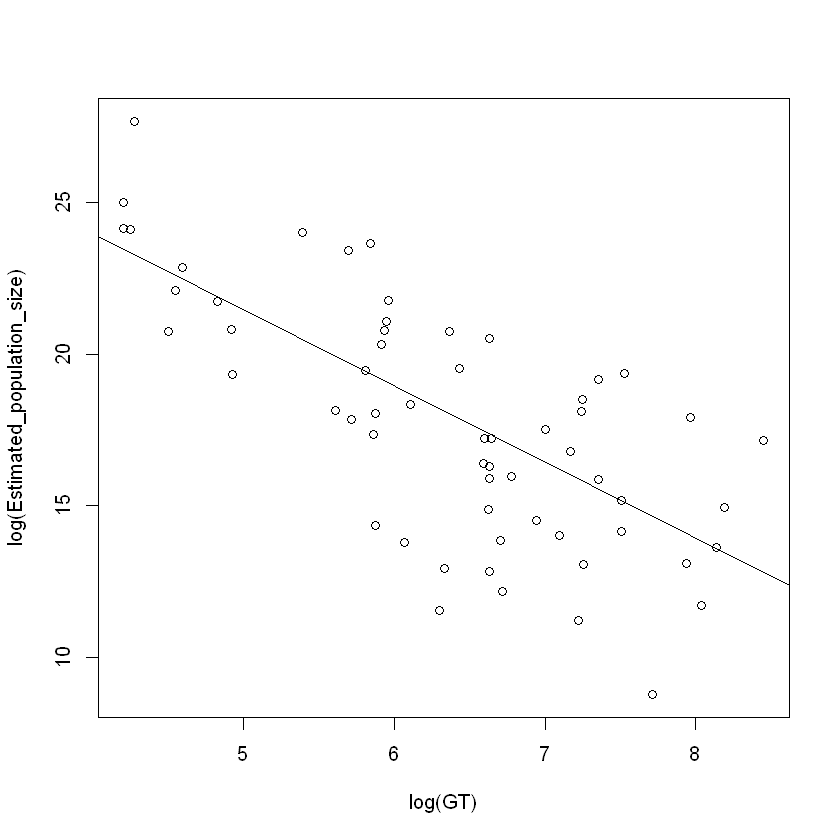

In [12]:
# pgls analysis between Nc and mass, GT
# method = "BM", "OUrandomRoot", "OUfixedRoot", "lambda", "kappa", "delta", "EB", "trend"
prun_data <- prunDataTree(ddata_Nc, 
                          ttree, 
                          list(x1='Estimated_population_size', x2='GT', x3='mass'))

print('---------------------------Nc ~ gt + mass')
pgls.model.nc <- phylolm(log(Estimated_population_size) ~ log(GT) + log(mass)
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')

summary(pgls.model.nc)
plot(pgls.model.nc)
cat("mass+gt: length data: ", length(prun_data$data$phy_label), "\n")

abline(a = 0, b = 1, col = "red", lwd = 1, lty=1)

print('---------------------------Nc ~ mass')

pgls.model.nc.mass <- phylolm(log(Estimated_population_size) ~ log(mass)
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')

summary(pgls.model.nc.mass)
plot(log(Estimated_population_size) ~ log(mass),data=prun_data$data)
abline(pgls.model.nc.mass)

print('---------------------------Nc ~ GT')

pgls.model.nc.gt <- phylolm(log(Estimated_population_size) ~ log(GT)
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')

summary(pgls.model.nc.gt)
plot(log(Estimated_population_size) ~ log(GT),data=prun_data$data)
abline(pgls.model.nc.gt)

## PIC, NC ~ generation time + adult mass


	Pearson's product-moment correlation

data:  pic.Nc and pic.mass
t = -3.5354, df = 57, p-value = 0.0008162
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6135359 -0.1884694
sample estimates:
       cor 
-0.4240838 



	Pearson's product-moment correlation

data:  pic.Nc and pic.gt
t = -2.9907, df = 57, p-value = 0.004105
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5705598 -0.1238903
sample estimates:
       cor 
-0.3682882 


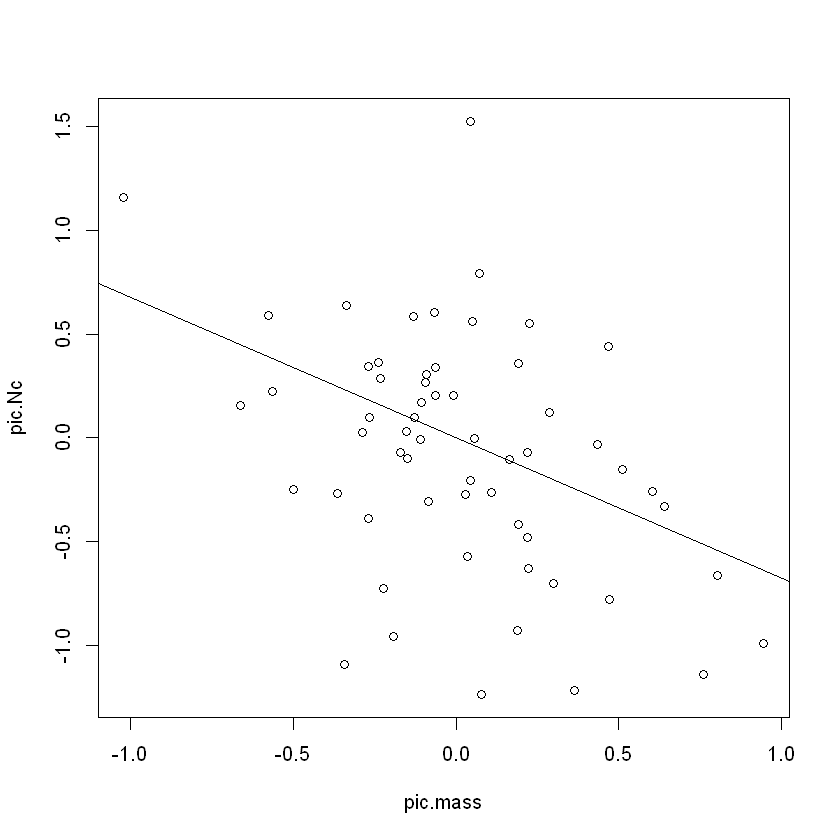

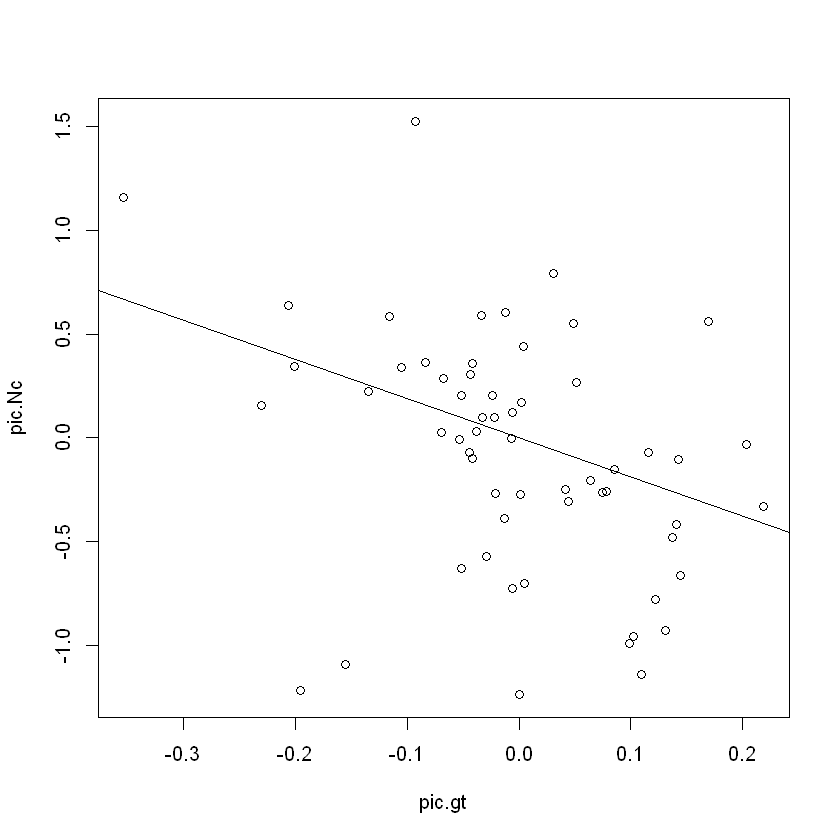

In [13]:
# PIC analysis between Nc and mass, GT
prun_data <- prunDataTree(ddata_Nc, 
                          ttree, 
                          list(x1='Estimated_population_size', x2='GT', x3='mass'))
Nc   <- setNames(log(prun_data$data$Estimated_population_size), rownames(prun_data$data))
mass <- setNames(log(prun_data$data$mass), rownames(prun_data$data))
gt <- setNames(log(prun_data$data$GT), rownames(prun_data$data))


# PIC
pic.Nc <- pic(Nc, prun_data$phy)
pic.mass <- pic(mass, prun_data$phy)
pic.gt <- pic(gt, prun_data$phy)


cor.test(pic.Nc, pic.mass)
plot(pic.Nc ~ pic.mass)
abline(lm(pic.Nc ~ pic.mass-1))

cor.test(pic.Nc, pic.gt)
plot(pic.Nc ~ pic.gt)
abline(lm(pic.Nc ~ pic.gt-1))

## PGLS; log(NC) ~ TAAI

### Fig. 3 (A)

[1] "---------------------------Nc ~ TAAI"
[1] 63
[1] "outliers"
character(0)



Call:
phylolm(formula = log(Estimated_population_size) ~ TAAI_proteome, 
    data = prun_data$data, phy = prun_data$phy, model = "lambda")

   AIC logLik 
 323.6 -157.8 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-9.6776 -3.7731 -0.5505  2.2492  9.1910 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
lambda : 0.8724249
sigma2: 0.1399204 

Coefficients:
              Estimate   StdErr t.value   p.value    
(Intercept)   18.36416  3.48246  5.2733 1.864e-06 ***
TAAI_proteome  0.18688  3.74613  0.0499    0.9604    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 4.079e-05	Adjusted R-squared: -0.01635 

Note: p-values and R-squared are conditional on lambda=0.8724249.

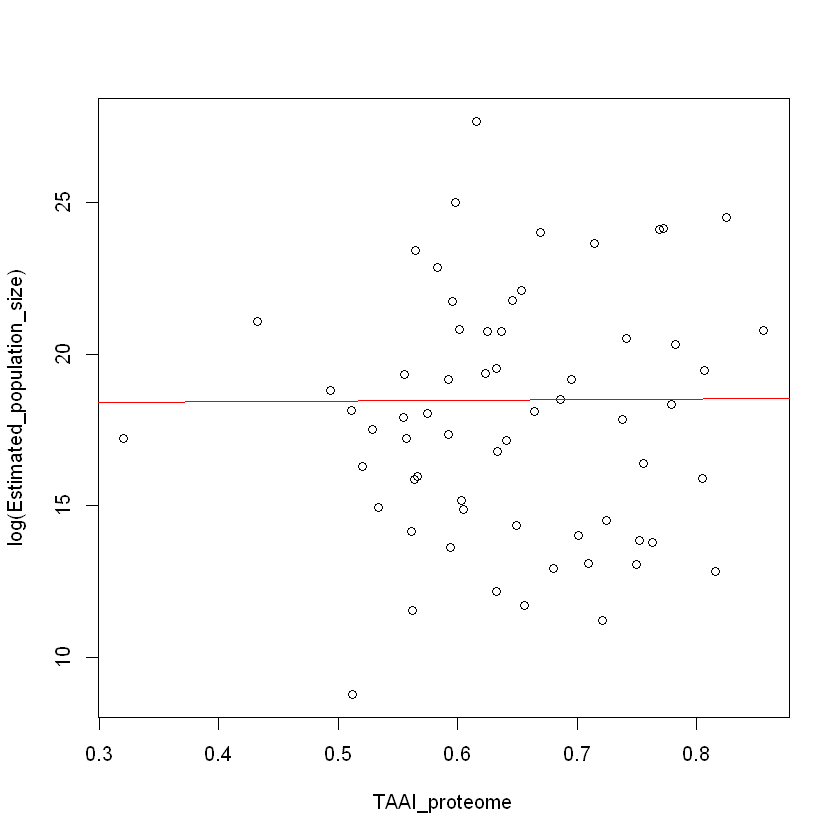

In [16]:
# pgls analysis between Nc and mass, GT
# method = "BM", "OUrandomRoot", "OUfixedRoot", "lambda", "kappa", "delta", "EB", "trend"
prun_data <- prunDataTree(ddata_Nc, 
                          ttree, 
                          list(x1='Estimated_population_size', x2='TAAI_proteome'))

print('---------------------------Nc ~ TAAI')
pgls.model.nc.taai <- phylolm(log(Estimated_population_size) ~ TAAI_proteome
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')
print(nrow(prun_data$data))

res<- residuals(pgls.model.nc.taai, phylo = TRUE)
res<- res/sqrt(var(res))[1]
outliers <- names(res)[(abs(res)>3)]
print('outliers')
print(outliers)

summary(pgls.model.nc.taai)
plot(log(Estimated_population_size) ~ TAAI_proteome,data=prun_data$data)
abline(pgls.model.nc.taai, col='red')

## same dataset: GTres ~ TAAI

---------------------------GTres ~ TAAI ,nrow:  60 



Call:
phylolm(formula = GTres ~ TAAI_proteome, data = prun_data$data, 
    phy = prun_data$phy, model = "lambda")

   AIC logLik 
133.43 -62.72 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-1.2976 -0.8437 -0.2991  0.3689  3.3189 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
lambda : 0.9360203
sigma2: 0.009579862 

Coefficients:
              Estimate   StdErr t.value  p.value   
(Intercept)    2.52349  0.87625  2.8799 0.005565 **
TAAI_proteome -1.64336  0.86283 -1.9046 0.061793 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.05886	Adjusted R-squared: 0.04264 

Note: p-values and R-squared are conditional on lambda=0.9360203.

outliers: Hylobates_moloch 



	Spearman's rank correlation rho

data:  pic.nc and pic.taai
S = 36306, p-value = 0.6457
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0609585 


---------------------------GTres ~ TAAI ,nrow:  59 
outliers: 


Call:
phylolm(formula = GTres ~ TAAI_proteome, data = prun_data_V2$data, 
    phy = prun_data_V2$phy, model = "lambda")

   AIC logLik 
116.55 -54.28 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-1.3047 -0.8602 -0.2991  0.3369  2.2584 

Mean tip height: 159.5321
Parameter estimate(s) using ML:
lambda : 0.9443898
sigma2: 0.007672515 

Coefficients:
              Estimate   StdErr t.value  p.value   
(Intercept)    2.64590  0.77785  3.4015 0.001231 **
TAAI_proteome -1.83618  0.75416 -2.4347 0.018056 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.0942	Adjusted R-squared: 0.07831 

Note: p-values and R-squared are conditional on lambda=0.9443898.

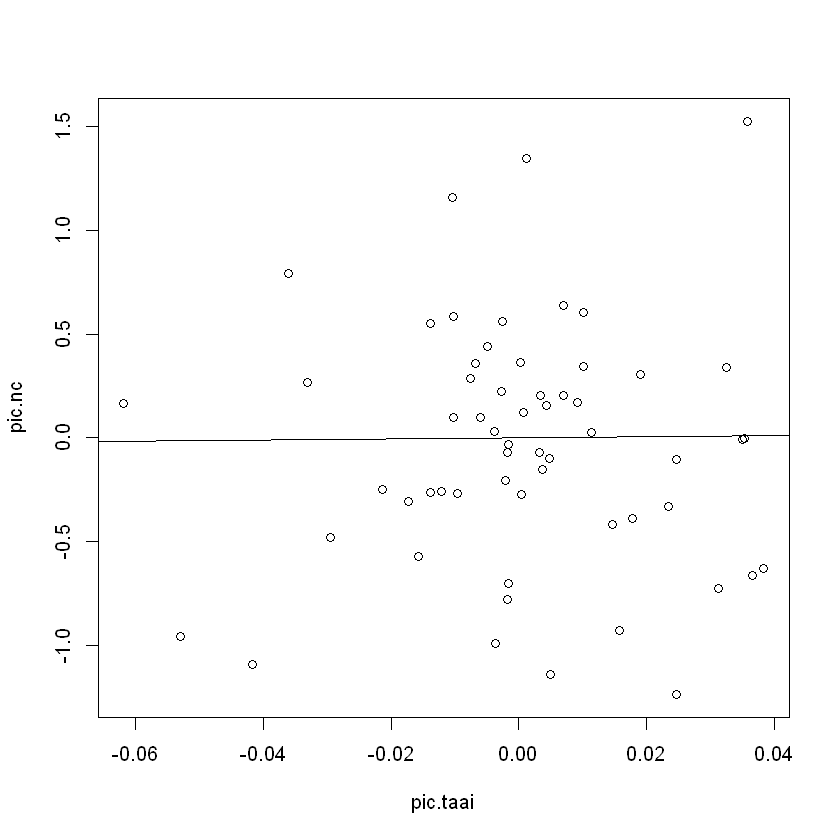


	Pearson's product-moment correlation

data:  pic.gtres and pic.taai
t = -2.4166, df = 56, p-value = 0.01895
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.52400643 -0.05323346
sample estimates:
       cor 
-0.3073038 


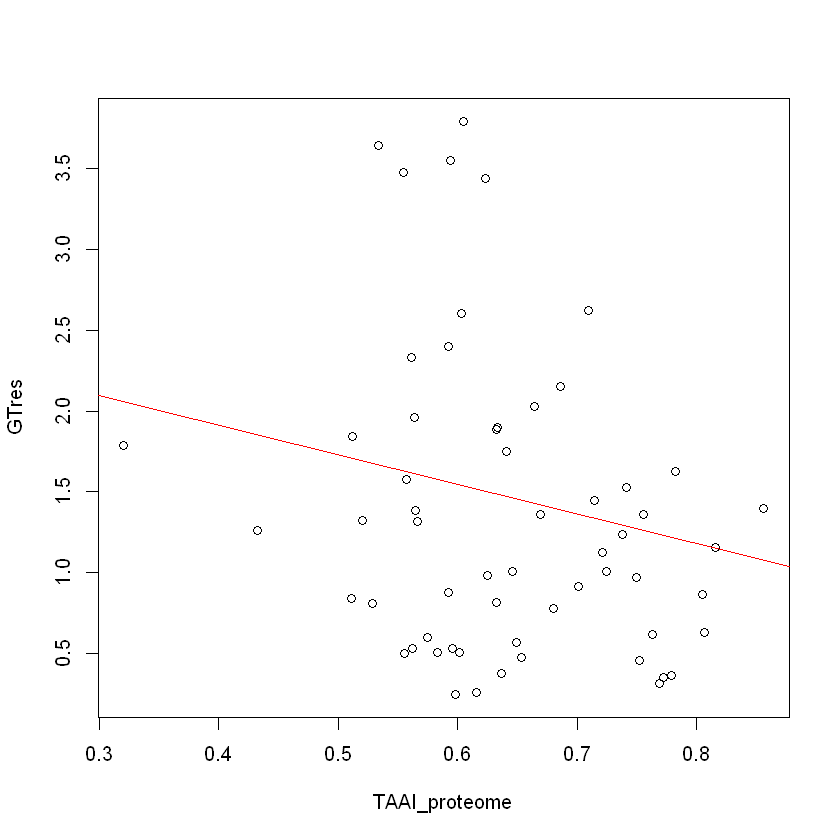

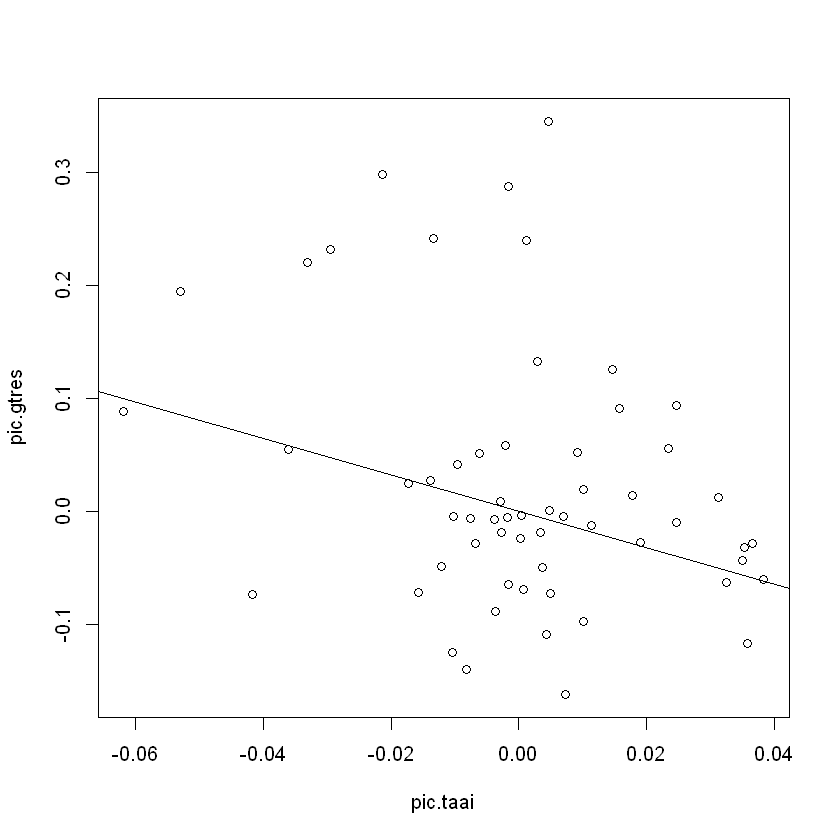

In [17]:
# pgls analysis between Nc TAAI
# method = "BM", "OUrandomRoot", "OUfixedRoot", "lambda", "kappa", "delta", "EB", "trend"
prun_data <- prunDataTree(ddata_Nc, 
                          ttree, 
                          list(x1='Estimated_population_size', x2='TAAI_proteome', x3='GTres'))

cat('---------------------------GTres ~ TAAI', ',nrow: ', nrow(prun_data$data),'\n')
pgls.nc.gtres <- phylolm(GTres ~ TAAI_proteome
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')
summary(pgls.nc.gtres)

res<- residuals(pgls.nc.gtres, phylo = TRUE)
res<- res/sqrt(var(res))[1]
outliers <- names(res)[(abs(res)>3)]
cat('outliers:',outliers,'\n')

# PIC correlation
nc <- setNames(log(prun_data$data$Estimated_population_size), rownames(prun_data$data))
taai  <- setNames(prun_data$data$TAAI_proteome, rownames(prun_data$data))


# PIC
pic.nc <- pic(nc, prun_data$phy)
pic.taai <- pic(taai, prun_data$phy)


cor.test(pic.nc, pic.taai, method='spearman')
plot(pic.nc ~ pic.taai)
abline(lm(pic.nc ~ pic.taai-1))




ddata_filter <- prun_data$data[!prun_data$data$phy_label %in% outliers ,]
prun_data_V2 <- prunDataTree(ddata_filter, 
                             ttree, 
                             list(x1='Estimated_population_size', x2='TAAI_proteome', x3='GTres'))

cat('---------------------------GTres ~ TAAI', ',nrow: ', nrow(prun_data_V2$data),'\n')
pgls.nc.gtres.out <- phylolm(GTres ~ TAAI_proteome
                            ,data=prun_data_V2$data
                            ,phy =prun_data_V2$phy
                            ,model='lambda')
res<- residuals(pgls.nc.gtres.out, phylo = TRUE)
res<- res/sqrt(var(res))[1]
outliers <- names(res)[(abs(res)>3)]
cat('outliers:',outliers)

summary(pgls.nc.gtres.out)
plot(GTres ~ TAAI_proteome,data=prun_data_V2$data)
abline(pgls.nc.gtres.out, col='red')

# PIC correlation
gtres <- setNames(prun_data_V2$data$GTres, rownames(prun_data_V2$data))
taai  <- setNames(prun_data_V2$data$TAAI_proteome, rownames(prun_data_V2$data))


# PIC
pic.gtres <- pic(gtres, prun_data_V2$phy)
pic.taai <- pic(taai, prun_data_V2$phy)


cor.test(pic.gtres, pic.taai)
plot(pic.gtres ~ pic.taai)
abline(lm(pic.gtres ~ pic.taai-1))

## Adult body mass ~ TAAI

### Fig. 3(B)

[1] "---------------------------mass ~ TAAI"
[1] "outliers"
character(0)
data length:	 125


Call:
phylolm(formula = log(mass) ~ TAAI_proteome, data = prun_data$data, 
    phy = prun_data$phy, model = "lambda")

   AIC logLik 
 489.1 -240.6 

Raw residuals:
   Min     1Q Median     3Q    Max 
-6.028 -2.671  1.390  3.946  8.577 

Mean tip height: 188.3046
Parameter estimate(s) using ML:
lambda : 1
sigma2: 0.1054201 

Coefficients:
              Estimate  StdErr t.value p.value  
(Intercept)    6.57362 2.53147  2.5968 0.01056 *
TAAI_proteome  0.36435 1.23843  0.2942 0.76910  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.0007032	Adjusted R-squared: -0.007421 

Note: p-values and R-squared are conditional on lambda=1.


	Pearson's product-moment correlation

data:  pic.mass and pic.taai
t = 0.33245, df = 122, p-value = 0.7401
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1470110  0.2053129
sample estimates:
       cor 
0.03008542 


Warning message in cor.test.default(pic.mass, pic.taai, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  pic.mass and pic.taai
S = 303178, p-value = 0.613
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04586024 


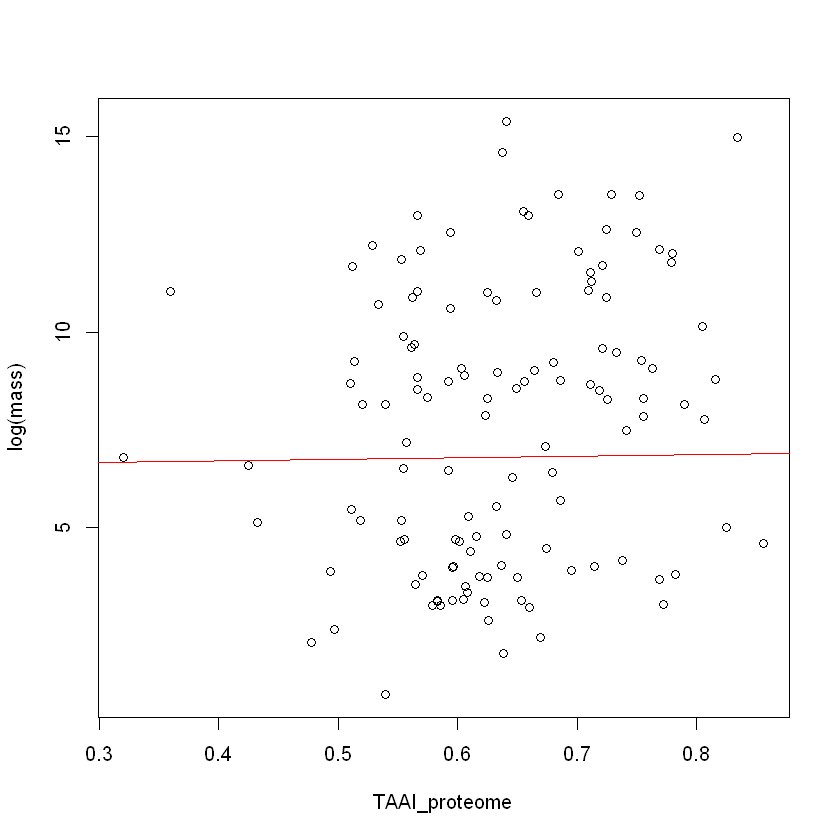

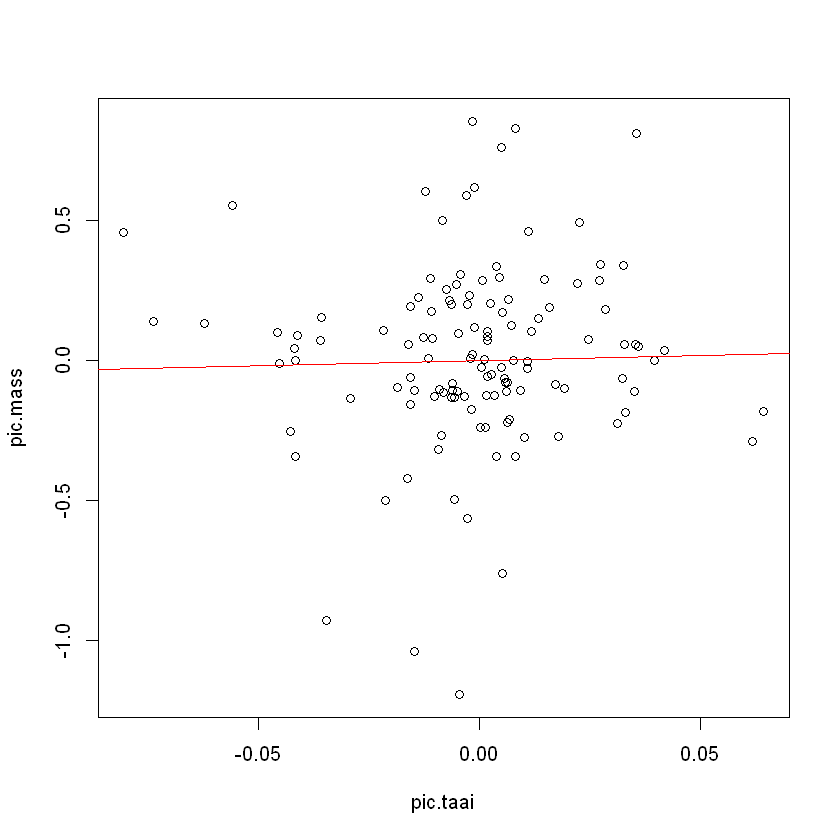

In [18]:
# pgls analysis between mass and TAAI
# method = "BM", "OUrandomRoot", "OUfixedRoot", "lambda", "kappa", "delta", "EB", "trend"
prun_data <- prunDataTree(ddata[ddata$mammalia_class!='aquatic',], 
                          ttree, 
                          list(x1='mass', x2='TAAI_proteome'))

print('---------------------------mass ~ TAAI')
pgls.mass.taai <- phylolm(log(mass) ~ TAAI_proteome
                    ,data=prun_data$data
                    ,phy =prun_data$phy
                    ,model='lambda')

res<- residuals(pgls.mass.taai, phylo = TRUE)
res<- res/sqrt(var(res))[1]
outliers <- names(res)[(abs(res)>3)]
print('outliers')
print(outliers)

cat('data length:\t', nrow(prun_data$data))

summary(pgls.mass.taai)
plot(log(mass) ~ TAAI_proteome,data=prun_data$data)
abline(pgls.mass.taai, col='red')

# PIC correlation
mass <- setNames(log(prun_data$data$mass), rownames(prun_data$data))
taai <- setNames(prun_data$data$TAAI_proteome, rownames(prun_data$data))


# PIC
pic.mass <- pic(mass, prun_data$phy)
pic.taai <- pic(taai, prun_data$phy)


cor.test(pic.mass, pic.taai, method='pearson')
cor.test(pic.mass, pic.taai, method='spearman')

plot(pic.mass ~ pic.taai)
abline(lm(pic.mass ~ pic.taai-1), col='red')